In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',
                 parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

In [8]:
df.index[0]

2016

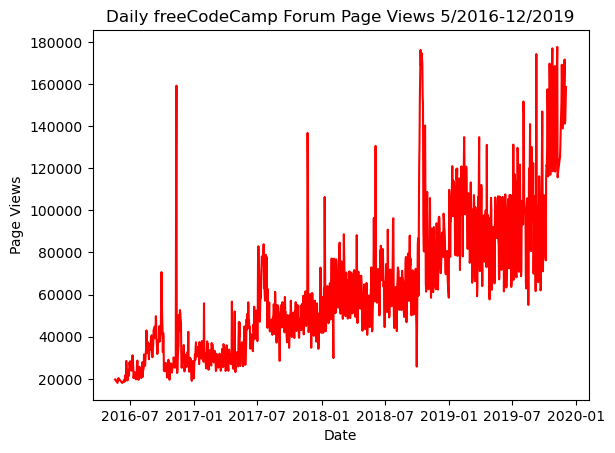

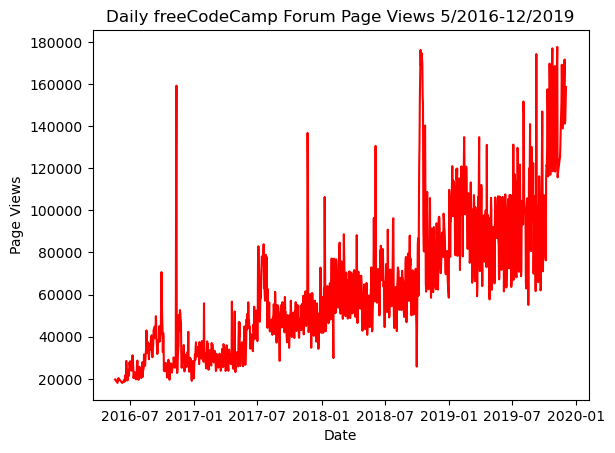

In [9]:
def draw_line_plot():
    # Draw line plot

    fig, ax = plt.subplots()
    ax.plot(df.index, df['value'], color='red', label='value')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

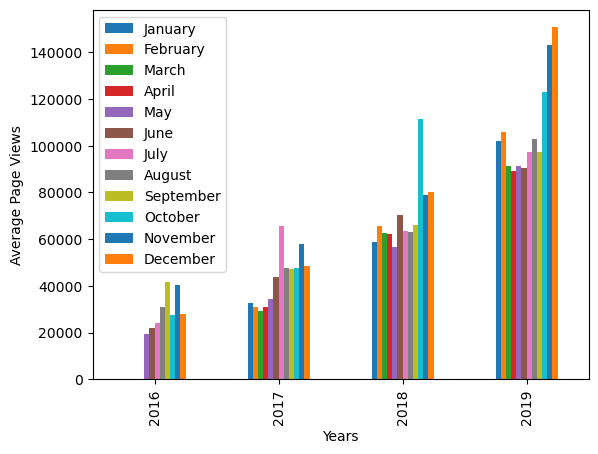

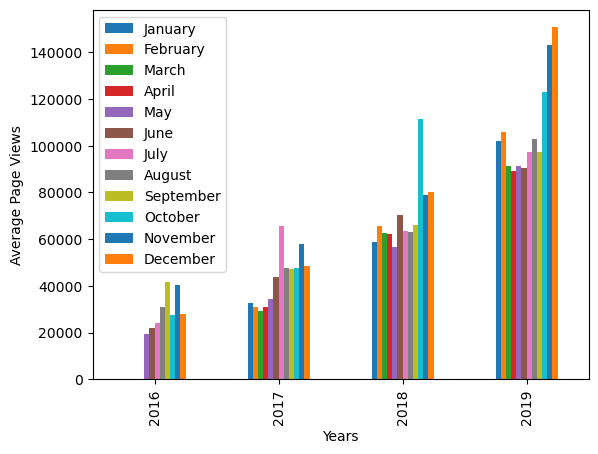

In [12]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month']).mean()

    # Draw bar plot
    fig, ax = plt.subplots()
    df_bar.unstack().plot(kind='bar', ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

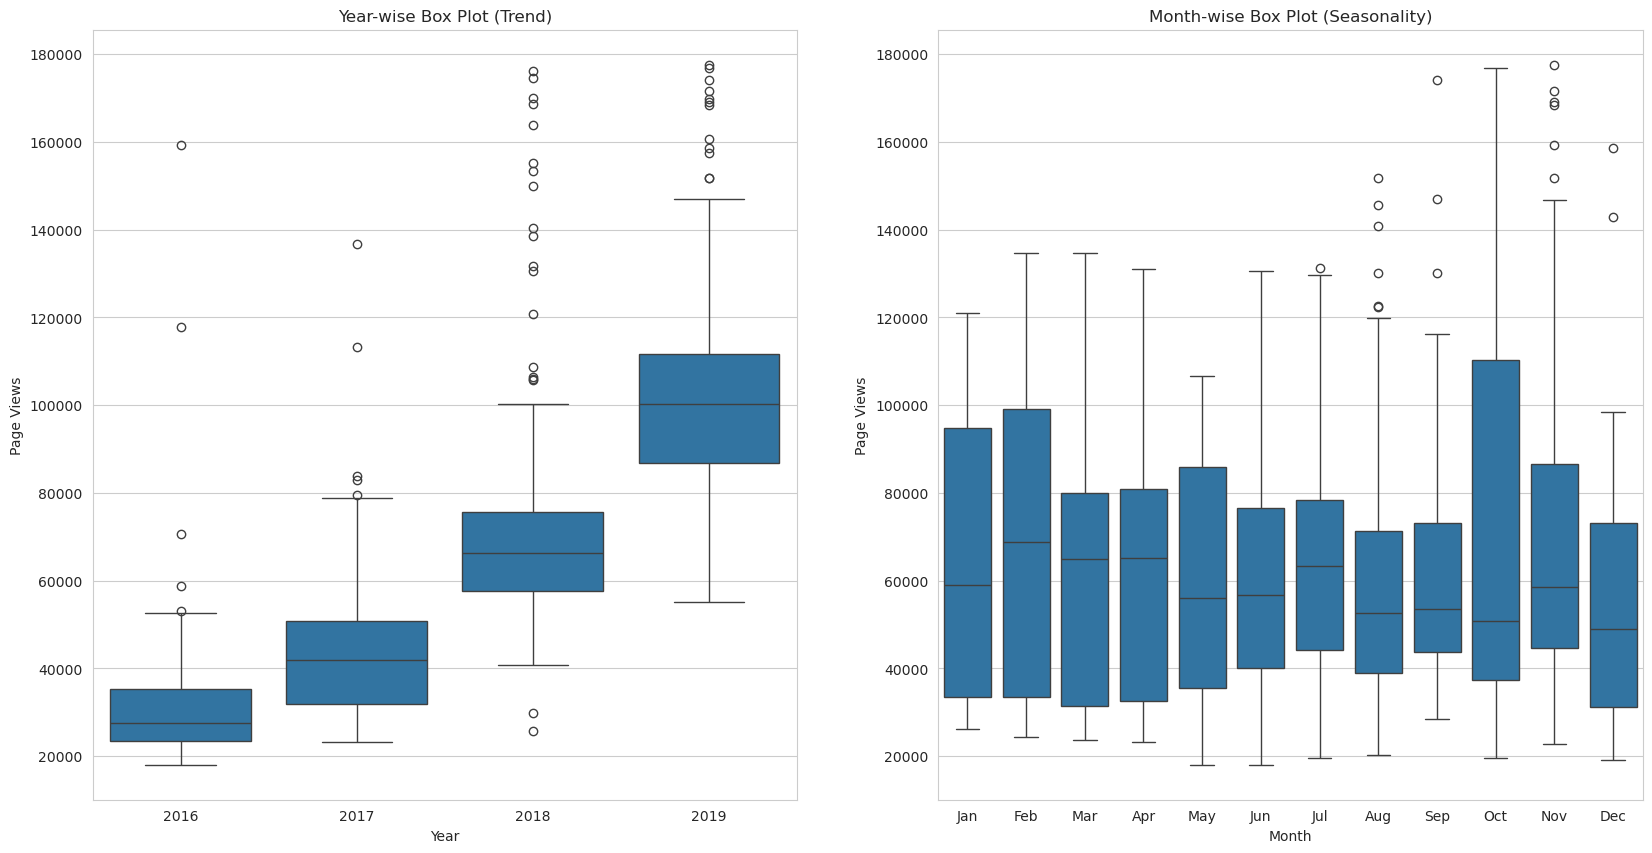

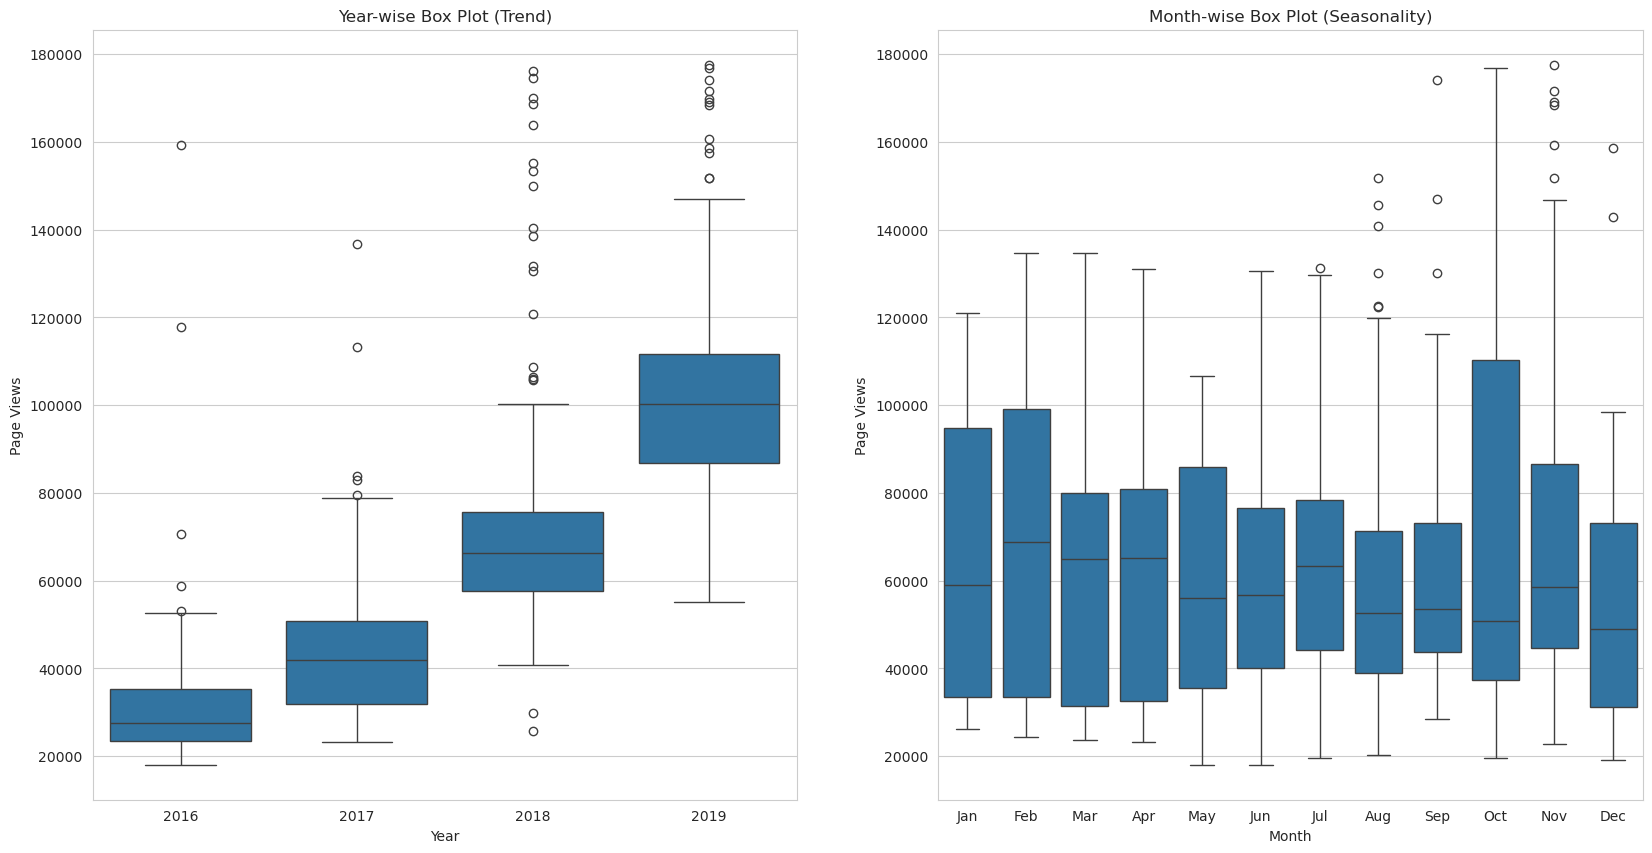

In [15]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(10)

    sns.boxplot(x='year', y='value', data=df_box, ax=ax[0])
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()